In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plt.rcParams['figure.figsize'] = (12, 6)

In [ ]:
df=pd.read_csv('/content/Marketing.csv')

# EDA

In [ ]:
df.head()

,CustomerID,Customer_Name,Bill_To_CustomerID,Customer_CategoryID,Customer_Category_Name,Buying_GroupID,Account_Opened_Date,OrderID,Order_Date,Quantity,Unit_Price,Revenue
0,998,Mahavir Sonkar,998,5.0,Computer Store,NaN,1/1/2013,429.0,1/8/2013,7.0,13.0,91.0
1,846,Malorie Bousquet,846,6.0,Gift Store,NaN,1/1/2013,1267.0,1/25/2013,7.0,13.0,91.0
2,858,Bimla PrabhupÄda,858,3.0,Novelty Shop,NaN,1/1/2013,1316.0,1/25/2013,7.0,13.0,91.0
3,166,"Tailspin Toys (McCamey, TX)",1,3.0,Novelty Shop,1.0,1/1/2013,2117.0,2/11/2013,7.0,13.0,91.0
4,508,"Wingtip Toys (Branson West, MO)",401,3.0,Novelty Shop,2.0,1/1/2013,2587.0,2/22/2013,7.0,13.0,91.0


In [ ]:
df[['Customer', 'Location']] = df['Customer_Name'].str.extract(r'([^(]+)(?:\s?\(([^)]+)\))?')

In [ ]:
df['State'] = df['Location'].str.extract(r',\s*(\w{2})$')

In [ ]:
state_mapping = {
    'TX': 'Texas', 'MO': 'Missouri', 'SC': 'South Carolina', 'MN': 'Minnesota',
    'PA': 'Pennsylvania', 'WA': 'Washington', 'OK': 'Oklahoma', 'NY': 'New York',
    'AL': 'Alabama', 'VT': 'Vermont', 'SD': 'South Dakota', 'LA': 'Louisiana',
    'GA': 'Georgia', 'CA': 'California', 'Unknown': 'Unknown'  # Adding the "Unknown" category
}

In [ ]:
df['State'] = df['State'].map(state_mapping)

In [ ]:
df.isnull().sum()

,0
CustomerID,0
Customer_Name,0
Bill_To_CustomerID,0
Customer_CategoryID,1
Customer_Category_Name,1
Buying_GroupID,54468
Account_Opened_Date,1
OrderID,1
Order_Date,1
Quantity,1


In [ ]:
df.duplicated().sum()

np.int64(2464)

In [ ]:
df.shape

(146557, 15)

# DATA CLEANING

In [ ]:
df = df.drop_duplicates()

In [ ]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Account_Opened_Date'] = pd.to_datetime(df['Account_Opened_Date'])

In [ ]:
df['Buying_GroupID'].value_counts(dropna=True).head(10)

,count
Buying_GroupID,
1.0,45410
2.0,45124


handeling nulls

In [ ]:
df['Buying_GroupID'] = df['Buying_GroupID'].fillna('Unknown')

In [ ]:
df['Location'] = df['Location'].fillna('Unknown')

In [ ]:
df['State'].fillna('Unknown', inplace=True)

<ipython-input-134-7c26ee4d15dd>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['State'].fillna('Unknown', inplace=True)


# Data Analysis

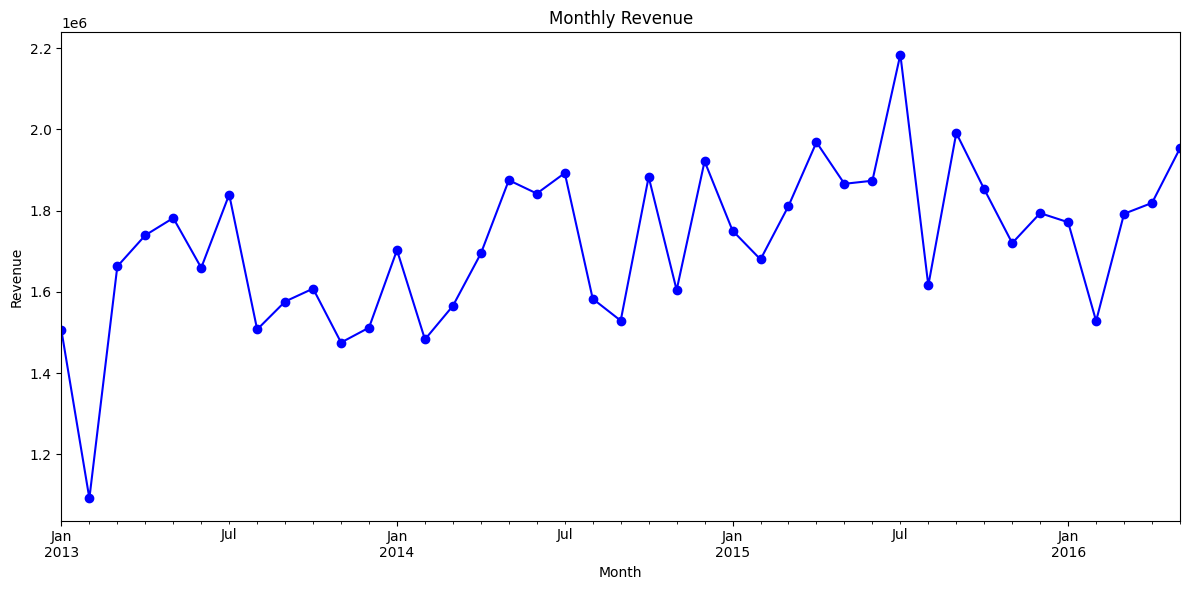

In [ ]:
monthly_revenue = df.groupby(df['Order_Date'].dt.to_period('M'))['Revenue'].sum()
monthly_revenue.plot(title='Monthly Revenue', figsize=(12, 6), marker='o', color='b')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

sales performance by location

In [ ]:
revenue_by_location = df.groupby('Location')['Revenue'].sum().reset_index()
revenue_by_location.columns = ['Location', 'Total_Revenue']
top_revenue_locations = revenue_by_location.sort_values(by='Total_Revenue', ascending=False).head(10)

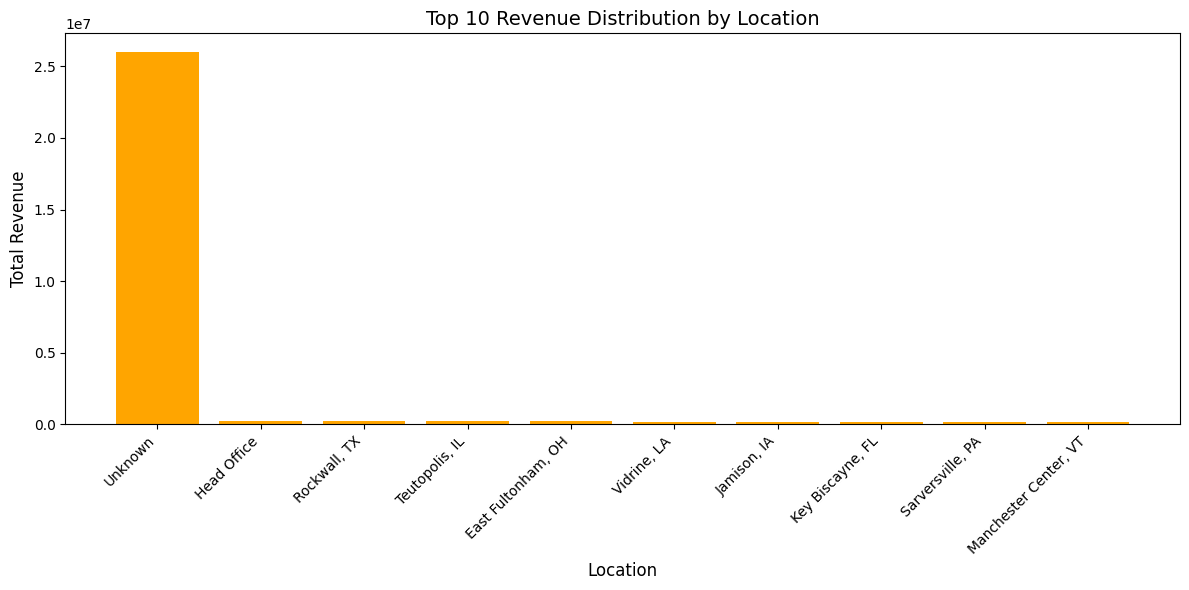

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(top_revenue_locations['Location'], top_revenue_locations['Total_Revenue'], color='orange')
plt.title('Top 10 Revenue Distribution by Location', fontsize=14)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
#Group the data by state for analysis
state_group = df.groupby('State')['Location'].count().reset_index()
state_group.columns = ['State', 'Customer_Count']

In [ ]:
#Revenue analysis by state
revenue_by_state = revenue_by_state.sort_values(by='Total_Revenue', ascending=False)

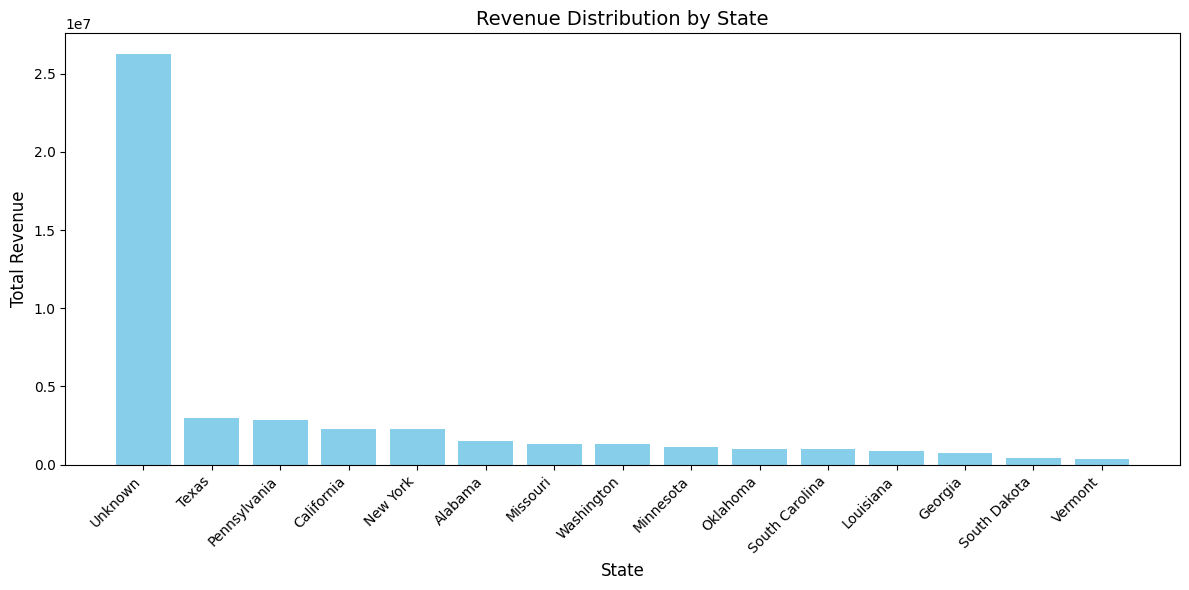

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(revenue_by_state['State'], revenue_by_state['Total_Revenue'], color='skyblue')
plt.title('Revenue Distribution by State', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

What is the overall sales performance by customer category?

In [ ]:
category_revenue = df.groupby('Customer_Category_Name')['Revenue'].sum().reset_index()
category_revenue = category_revenue.sort_values(by='Revenue', ascending=False)
print("Revenue by Customer Category:\n", category_revenue)

Revenue by Customer Category:
   Customer_Category_Name     Revenue
3           Novelty Shop  50370607.8
4            Supermarket   5865969.0
0         Computer Store   4818937.0
2             Gift Store   4755297.2
1              Corporate   4695254.0


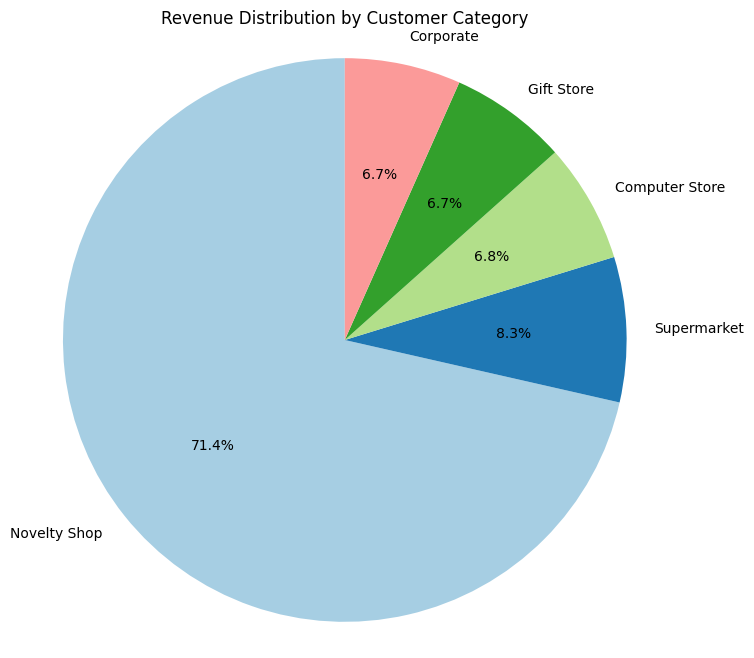

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(category_revenue['Revenue'], labels=category_revenue['Customer_Category_Name'],
        autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Revenue Distribution by Customer Category')
plt.axis('equal')
plt.show()


 b. Which customers generate the highest revenue?

In [ ]:
top_customers = df.groupby('Customer')['Revenue'].sum().sort_values(ascending=False).head(5)

<ipython-input-75-795c760bfccf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.values, y=top_customers.index, palette='coolwarm')


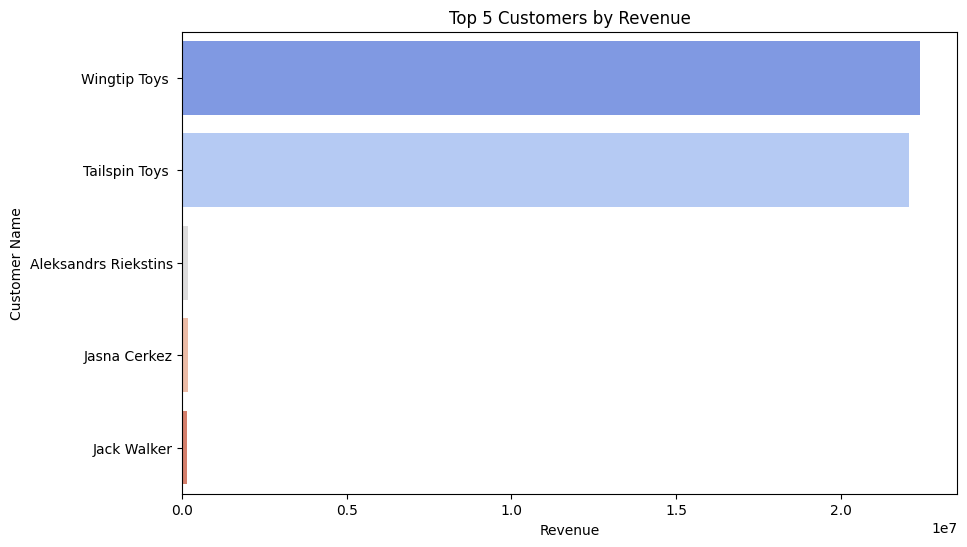

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_customers.values, y=top_customers.index, palette='coolwarm')
plt.title('Top 5 Customers by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Customer Name')
plt.show()

What is the distribution of revenue by Buying Group?


In [ ]:
revenue_by_group = df.groupby('Buying_GroupID')['Revenue'].sum()
print("\nRevenue by Buying Group:")
print(revenue_by_group)


Revenue by Buying Group:
Buying_GroupID
1.0        22074682.6
2.0        22430331.4
Unknown    26001051.0
Name: Revenue, dtype: float64


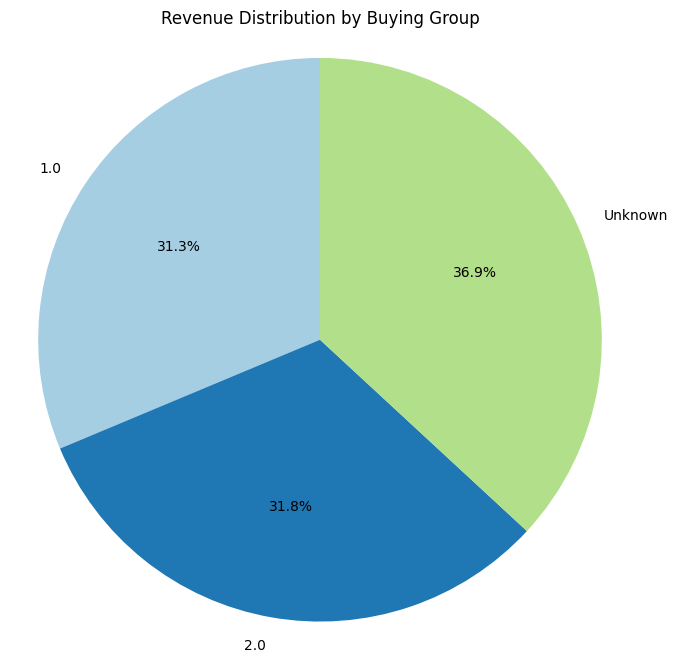

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(revenue_by_group.values, labels=revenue_by_group.index, autopct='%1.1f%%',
        startangle=90, colors=plt.cm.Paired.colors)
plt.title('Revenue Distribution by Buying Group')
plt.axis('equal')
plt.show()

In [ ]:
# Calculate the total order value (Revenue per order)
df['Order_Total'] = df['Quantity'] * df['Unit_Price']

In [ ]:
# Calculate the days since the account was opened
df['Days_Active'] = (pd.to_datetime('today') - df['Account_Opened_Date']).dt.days

In [ ]:
#Calculate days between account opening and order
df['Days_between_Account_ORDER'] = (df['Order_Date'] - df['Account_Opened_Date']).dt.days

customer segmentation

In [ ]:
total_revenue = df.groupby('CustomerID')['Revenue'].sum()
bins = [0, 500, 1500, total_revenue.max()]
labels = ['Low', 'Medium', 'High']
customer_segments = pd.cut(total_revenue, bins=bins, labels=labels, right=True)
df['Customer_Segment'] = df['CustomerID'].map(customer_segments)
print(df[['CustomerID', 'Customer', 'Revenue', 'Customer_Segment']].head())

   CustomerID           Customer  Revenue Customer_Segment
0         998     Mahavir Sonkar     91.0             High
1         846   Malorie Bousquet     91.0             High
2         858  Bimla PrabhupÄda     91.0             High
3         166     Tailspin Toys      91.0             High
4         508      Wingtip Toys      91.0             High


<ipython-input-56-c18ddc09397a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.values, y=top_customers.index, palette='coolwarm')


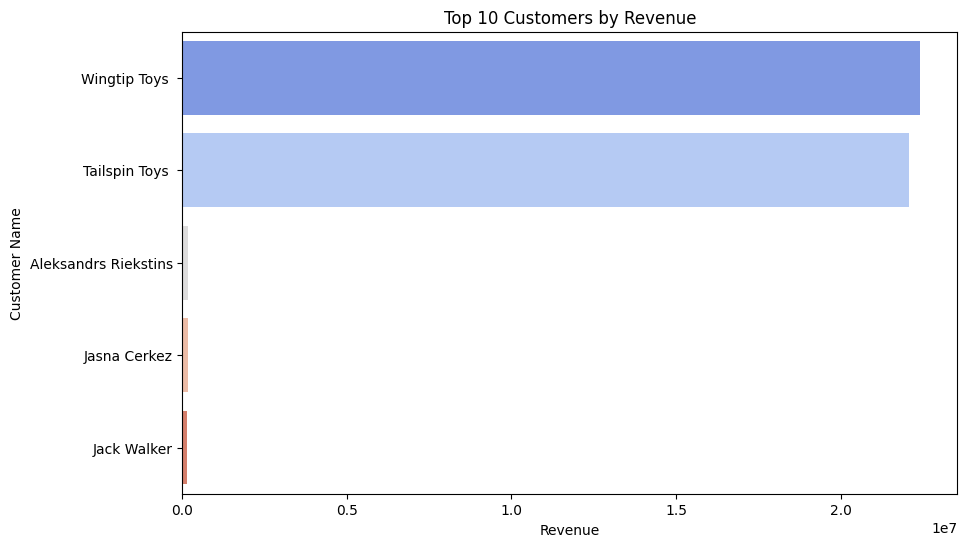

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_customers.values, y=top_customers.index, palette='coolwarm')
plt.title('Top 10 Customers by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Customer Name')
plt.show()

RFM (Recency, Frequency, Monetary)

In [ ]:
latest_date = df['Order_Date'].max() + pd.Timedelta(days=1)


In [ ]:
rfm = df.groupby('CustomerID').agg({
    'Order_Date': lambda x: (latest_date - x.max()).days,
    'OrderID': 'count',
    'Revenue': 'sum'
}).reset_index()

In [ ]:
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

In [ ]:
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])


In [ ]:
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)


In [ ]:
def classify_segment(score):
    r, f, m = score[0], score[1], score[2]

    if score == '555':
        return 'Top Customers'
    elif r in ['4', '5'] and f in ['4', '5']:
        return 'Loyal'
    elif r in ['4', '5'] and f in ['1', '2']:
        return 'At Risk'
    elif r in ['3', '4'] and f in ['3', '4', '5']:
        return 'Potential Loyalists'
    elif f == '1':
        return 'One-Time Buyers'
    elif r in ['2', '3'] and f in ['2', '3']:
        return 'Need Attention'
    elif r == '5' and f == '1':
        return "Can't Lose Them"
    elif r == '2' and f == '2':
        return "About To Sleep"
    else:
        return 'Need Attention'  # fallback to valid category instead of 'Others'

rfm['Segment'] = rfm['RFM_Score'].apply(classify_segment)


In [ ]:
segment_counts = rfm['Segment'].value_counts()


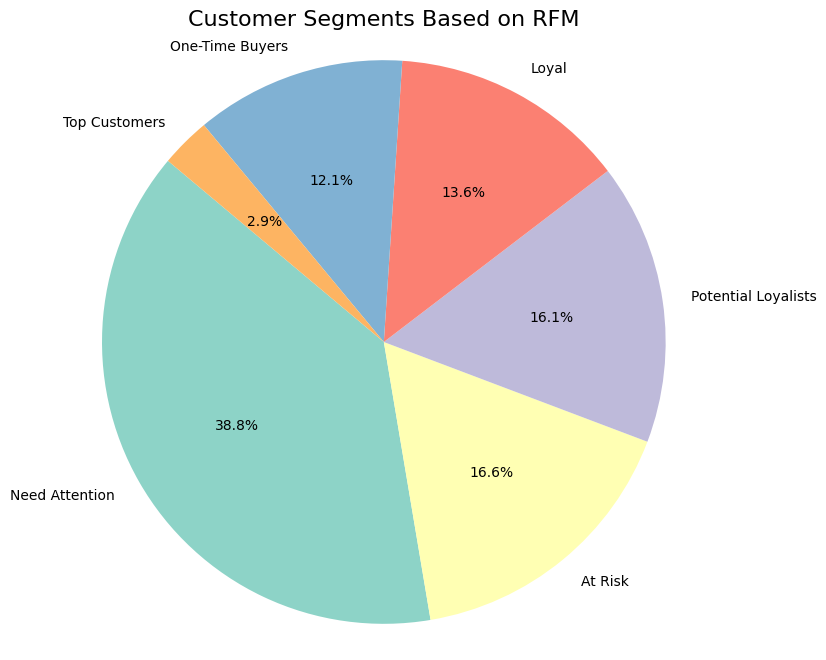

In [ ]:
plt.figure(figsize=(8, 8))
colors = plt.cm.Set3.colors
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Customer Segments Based on RFM', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

In [ ]:
# Save the edited DataFrame to a CSV file
df.to_csv('modified_data.csv', index=False)